***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [3]:
print(df.head())
df.shape

   UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631


(76840, 7)

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)
### 2º Definir os labels das classes
### 3º Construir a coluna de frequências

In [4]:
# Definindo o valor do salário mínimo como base para determinar as classes de renda
salario_minimo = 788.00

# Definindo os intervalos que delimitam as classes sociais com base no salário mínimo
# Cada intervalo representa uma faixa de renda, onde o primeiro intervalo vai de menos infinito até 1x o salário mínimo,
# o segundo intervalo vai de 1x até 2x o salário mínimo, e assim por diante.
intervalos = [
    -float("inf"),
    salario_minimo,
    2 * salario_minimo,
    5 * salario_minimo,
    10 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    float("inf"),
]
rotulos = ["G", "F", "E", "D", "C", "B", "A"]

# Adicionando uma nova coluna chamada 'Classe' no DataFrame para representar as classes de renda
# Utilizando a função pd.cut() para categorizar os valores da coluna "Renda" nos intervalos definidos, 
# atribuindo os rótulos correspondentes a cada intervalo
df["Classe"] = pd.cut(df["Renda"], bins=intervalos, labels=rotulos, right=False)

# Contagem do número de indivíduos em cada classe de renda
# Utilizando o método value_counts() para contar a frequência de cada classe de renda no DataFrame
frequencia_renda = df["Classe"].value_counts()

# Ordenando as classes de renda em ordem decrescente (de A a G)
# Utilizando o método sort_index() para ordenar as classes de renda em ordem alfabética decrescente
frequencia_renda = frequencia_renda.sort_index(ascending=False)

# Calculando a porcentagem de indivíduos em cada classe de renda
# Dividindo a frequência de cada classe pelo número total de linhas do DataFrame e multiplicando por 100
total_linhas = df.shape[0]
percentual = (frequencia_renda / total_linhas) * 100

# Criando um DataFrame para armazenar a frequência e a porcentagem de cada classe de renda
# Utilizando a função pd.DataFrame() para criar um novo DataFrame com as frequências e porcentagens calculadas
distribuicao_de_frequencia_renda = pd.DataFrame({"Frequencia": frequencia_renda, "Porcentagem (%)": percentual})

# Exibindo a distribuição de frequência das classes de renda
print("Frequência e Porcentagem (%) de cada classe de renda:")
print(distribuicao_de_frequencia_renda)

# Calculando a soma total das frequências das classes de renda
# Utilizando o método sum() para somar todas as frequências das classes de renda
soma_total_classes = frequencia_renda.sum()
print("\nSoma de todas as classes:", soma_total_classes)

# Verificando se a soma total das frequências coincide com o número total de linhas no DataFrame
# Comparando a soma total das frequências com o número total de linhas do DataFrame e exibindo uma mensagem correspondente
if soma_total_classes == total_linhas:
    print("A soma de todas as classes coincide com o número de linhas do DataFrame.")
else:
    print("A soma de todas as classes não coincide com o número de linhas do DataFrame. Verifique os dados ou o código.")


Frequência e Porcentagem (%) de cada classe de renda:
        Frequencia  Porcentagem (%)
Classe                             
A              420         0.546590
B              823         1.071057
C             1568         2.040604
D             5700         7.418011
E            18972        24.690265
F            34056        44.320666
G            15301        19.912806

Soma de todas as classes: 76840
A soma de todas as classes coincide com o número de linhas do DataFrame.


In [5]:
df.shape

(76840, 8)

In [6]:
distribuicao_de_frequencia_renda.shape

(7, 2)

### 4º Construir a coluna de percentuais
### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes
### 6º Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/home/clara/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


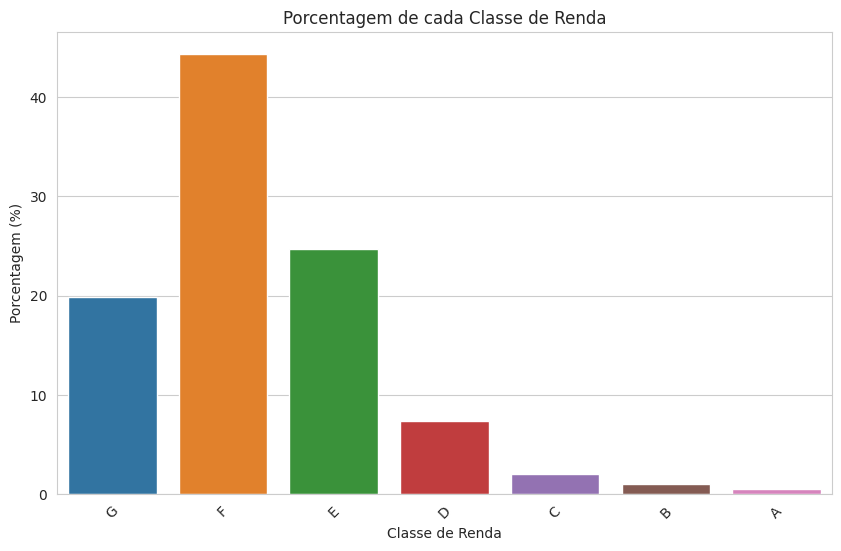

In [7]:
# Definindo o estilo do gráfico
# Utilizando a função sns.set_style() para definir o estilo do gráfico como "whitegrid", que adiciona grades de fundo brancas ao gráfico
sns.set_style("whitegrid")

# Criando o gráfico de barras
# Utilizando a função plt.figure() para criar uma figura com o tamanho especificado (10 polegadas de largura por 6 polegadas de altura)
# Utilizando a função sns.barplot() para criar o gráfico de barras com base nos dados do DataFrame distribuicao_de_frequencia_renda
# O eixo x é definido como os índices do DataFrame (as classes de renda) e o eixo y como a coluna "Porcentagem (%)"
plt.figure(figsize=(10, 6))
sns.barplot(data=distribuicao_de_frequencia_renda, x=distribuicao_de_frequencia_renda.index, y="Porcentagem (%)")

# Adicionando rótulos e título
# Utilizando as funções plt.xlabel(), plt.ylabel() e plt.title() para adicionar rótulos aos eixos x e y, e um título ao gráfico, respectivamente
plt.xlabel('Classe de Renda')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de cada Classe de Renda')

# Rotacionando os rótulos do eixo x para melhor visualização
# Utilizando a função plt.xticks() para rotacionar os rótulos do eixo x em 45 graus para melhor legibilidade
plt.xticks(rotation=45)

# Exibindo o gráfico
# Utilizando a função plt.show() para exibir o gráfico criado
plt.show()


        "Decidi adicionar mais classes de renda devido à grande disparidade nos intervalos originais, buscando uma análise mais refinada. Além disso, implementei verificações adicionais e defini uma variável que pode ser ajustada conforme o salário mínimo do ano em estudo."

Com base nos dados fornecidos da Pesquisa Nacional por Amostra de Domicílios - 2015, sobre a distribuição de renda das famílias brasileiras, podemos destacar alguns insights:

1. Desigualdade de renda: A distribuição da renda é bastante desigual, com uma grande concentração de famílias nas classes de menor renda (classes F e G), representando mais de 60% da amostra total.

2. Classe de renda predominante: A classe F, que representa famílias com renda entre 1 e 2 salários mínimos, é a mais frequente, com mais de 44% da amostra total.

3. Baixa representatividade das classes de renda mais alta: As classes A, B e C, que representam famílias com renda superior a 10 salários mínimos, juntas, representam menos de 5% da amostra total, evidenciando uma baixa representatividade de famílias com maior poder aquisitivo na pesquisa.

4. Grande número de famílias com baixa renda: As classes E, F e G, que representam famílias com renda de até 5 salários mínimos, correspondem a mais de 88% da amostra total, indicando que a maioria das famílias pesquisadas possui uma renda considerada baixa.

Esses insights sugerem a necessidade de políticas públicas voltadas para a redução da desigualdade de renda e para o aumento do acesso da população a oportunidades de melhoria socioeconômica, como educação, emprego e saúde.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [8]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

### Obtenha a mediana

### Obtenha a moda

### Obtenha o desvio médio absoluto

### Obtenha a variância

### Obtenha o desvio-padrão

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [9]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...